Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Vincent Ngo"
COLLABORATORS = ""

---

Update: For those of you who have trouble getting your twitter developer account working: 
1. Run the cell to set up your notebook below (the one that starts with import csv).
2. Skip Question 1 and Question 2a.
3. Start with Question 2a-X instead. 
4. After completing 2a-X, continue on to question 2b and proceed as normal.

# Project 1: Trump, Twitter, and Text

Welcome to the first project of Data 100! In this project, we will work with the Twitter API in order to analyze Donald Trump's tweets.

**The project is due 11:59pm Thursday, October 25, California Time.**

You do not have to work on this project before the midterm, but you might find it helpful, since it goes over a lot of pandas materials that we haven't used in a while.

**Fun:**

We intend this project to be fun! You will analyze actual data from the Twitter API. You will also draw conclusions about the current (and often controversial) US President's tweet behavior. If you find yourself getting frustrated or stuck on one problem for too long, we suggest coming into office hours and working with friends in the class.

With that in mind, let's get started!

In [2]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json
from pprint import pprint

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

# Downloading Recent Tweets

---

Since we'll be looking at Twitter data, we need to download the data from Twitter!

Twitter provides an API for downloading tweet data in large batches.  The `tweepy` package makes it fairly easy to use.

In [3]:
## Make sure you are in your data100 conda environment if you are working locally.
# The following should run:
import tweepy

There are instructions on using `tweepy` [here](http://tweepy.readthedocs.io/en/v3.5.0/getting_started.html), but we will give you example code.

Twitter requires you to have authentication keys to access their API.  To get your keys, you'll have to sign up as a Twitter developer.  The next question will walk you through this process.

## Question 1

Follow the instructions below to get your Twitter API keys.  **Read the instructions completely before starting.**

1. [Create a Twitter account](https://twitter.com).  You can use an existing account if you have one; if you prefer to not do this assignment under your regular account, feel free to create a throw-away account.
2. Under account settings, add your phone number to the account.
3. [Create a Twitter developer account](https://dev.twitter.com/resources/signup) by clicking the 'Apply' button on the top right of the page. Attach it to your Twitter account. You'll have to fill out a form describing what you want to do with the developer account. Explain that you are doing this for a class at UC Berkeley and that you don't know exactly what you're building yet and just need the account to get started. These applications are approved by some sort of AI system, so it doesn't matter exactly what you write. Just don't enter a bunch of alweiofalwiuhflawiuehflawuihflaiwhfe type stuff or you might get rejected.
4. Once you're logged into your developer account, [create an application for this assignment](https://apps.twitter.com/app/new).  You can call it whatever you want, and you can write any URL when it asks for a web site.  You don't need to provide a callback URL.
5. On the page for that application, find your Consumer Key and Consumer Secret.
6. On the same page, create an Access Token.  Record the resulting Access Token and Access Token Secret.
7. Edit the file [keys.json](keys.json) and replace the placeholders with your keys.  


## WARNING (Please Read) !!!!


### Protect your Twitter Keys
<span style="color:red">
If someone has your authentication keys, they can access your Twitter account and post as you!  So don't give them to anyone, and **don't write them down in this notebook**. 
</span>
The usual way to store sensitive information like this is to put it in a separate file and read it programmatically.  That way, you can share the rest of your code without sharing your keys.  That's why we're asking you to put your keys in `keys.json` for this assignment.


### Avoid making too many API calls.

<span style="color:red">
Twitter limits developers to a certain rate of requests for data.  If you make too many requests in a short period of time, you'll have to wait awhile (around 15 minutes) before you can make more.  </span> 
So carefully follow the code examples you see and don't rerun cells without thinking.  Instead, always save the data you've collected to a file.  We've provided templates to help you do that.


### Be careful about which functions you call!

<span style="color:red">
This API can retweet tweets, follow and unfollow people, and modify your twitter settings.  Be careful which functions you invoke! </span> One of the sp18 instructors accidentally re-tweeted some tweets because that instructor typed `retweet` instead of `retweet_count`. 
</span>


In [4]:
import json
key_file = 'keys.json'
# Loading your keys from keys.json (which you should have filled
# in in question 1):
with open(key_file) as f:
    keys = json.load(f)
# if you print or view the contents of keys be sure to delete the cell!

This cell tests the Twitter authentication. It should run without errors or warnings and display your Twitter username.

In [5]:
import tweepy
from tweepy import TweepError
import logging

try:
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)
    print("Your username is:", api.auth.get_username())
except TweepError as e:
    logging.warning("There was a Tweepy error. Double check your API keys and try again.")
    logging.warning(e)

## Question 2

In the example below, we have loaded some tweets by @BerkeleyData.  Run it and read the code.

In [ ]:
from pathlib import Path
import json

ds_tweets_save_path = "BerkeleyData_recent_tweets.json"
# Guarding against attempts to download the data multiple
# times:
if not Path(ds_tweets_save_path).is_file():
    # Getting as many recent tweets by @BerkeleyData as Twitter will let us have.
    # We use tweet_mode='extended' so that Twitter gives us full 280 character tweets.
    # This was a change introduced in September 2017.
    
    # The tweepy Cursor API actually returns "sophisticated" Status objects but we 
    # will use the basic Python dictionaries stored in the _json field. 
    example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, id="BerkeleyData", 
                                             tweet_mode='extended').items()]
    
    # Saving the tweets to a json file on disk for future analysis
    with open(ds_tweets_save_path, "w") as f:        
        json.dump(example_tweets, f)

# Re-loading the json file:
with open(ds_tweets_save_path, "r") as f:
    example_tweets = json.load(f)

Assuming everything ran correctly you should be able to look at the first tweet by running the cell below.

<span style="color:red">
**Warning** Do not attempt to view all the tweets in a notebook.  It will likely freeze your browser.  The following would be a **bad idea**:
```python
    pprint(example_tweets)
```

</span> 

In [ ]:
# Looking at one tweet object, which has type Status: 
from pprint import pprint # ...to get a more easily-readable view.
pprint(example_tweets[0])

## Question 2a

### What you need to do. 

Re-factor the above code fragment into reusable snippets below.  You should not need to make major modifications; this is mostly an exercise in understanding the above code block. 

In [1]:
def load_keys(path):
    """Loads your Twitter authentication keys from a file on disk.
    
    Args:
        path (str): The path to your key file.  The file should
          be in JSON format and look like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }
    
    Returns:
        dict: A dictionary mapping key names (like "consumer_key") to
          key values."""
    
    import json
    with open(path) as f:
        return json.load(f)

In [2]:
def download_recent_tweets_by_user(user_account_name, keys):
    """Downloads tweets by one Twitter user.

    Args:
        user_account_name (str): The name of the Twitter account
          whose tweets will be downloaded.
        keys (dict): A Python dictionary with Twitter authentication
          keys (strings), like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }

    Returns:
        list: A list of Dictonary objects, each representing one tweet."""
    import tweepy
    
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)

    return [t._json for t in tweepy.Cursor(api.user_timeline, id=user_account_name, 
                                             tweet_mode='extended').items()]

In [4]:
def save_tweets(tweets, path):
    """Saves a list of tweets to a file in the local filesystem.
    
    This function makes no guarantee about the format of the saved
    tweets, **except** that calling load_tweets(path) after
    save_tweets(tweets, path) will produce the same list of tweets
    and that only the file at the given path is used to store the
    tweets.  (That means you can implement this function however
    you want, as long as saving and loading works!)

    Args:
        tweets (list): A list of tweet objects (of type Dictionary) to
          be saved.
        path (str): The place where the tweets will be saved.

    Returns:
        None"""
    with open(path, "w") as f:
        import json
        json.dump(tweets, f)

In [5]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    with open(path, "rb") as f:
        import json
        return json.load(f)

In [3]:
def get_tweets_with_cache(user_account_name, keys_path):
    """Get recent tweets from one user, loading from a disk cache if available.
    
    The first time you call this function, it will download tweets by
    a user.  Subsequent calls will not re-download the tweets; instead
    they'll load the tweets from a save file in your local filesystem.
    All this is done using the functions you defined in the previous cell.
    This has benefits and drawbacks that often appear when you cache data:
    
    +: Using this function will prevent extraneous usage of the Twitter API.
    +: You will get your data much faster after the first time it's called.
    -: If you really want to re-download the tweets (say, to get newer ones,
       or because you screwed up something in the previous cell and your
       tweets aren't what you wanted), you'll have to find the save file
       (which will look like <something>_recent_tweets.pkl) and delete it.
    
    Args:
        user_account_name (str): The Twitter handle of a user, without the @.
        keys_path (str): The path to a JSON keys file in your filesystem.
    """
    
    save_path = "{}_recent_tweets.json".format(user_account_name)
    from pathlib import Path
    if not Path(save_path).is_file():
        keys = load_keys(keys_path)
        tweets = download_recent_tweets_by_user(user_account_name, keys)
        save_tweets(tweets, save_path)
    return load_tweets(save_path)

If everything was implemented correctly you should be able to obtain roughly the last 3000 tweets by the `realdonaldtrump`.  (This may take a few minutes)

In [ ]:
# When you are done, run this cell to load @realdonaldtrump's tweets.
# Note the function get_tweets_with_cache.  You may find it useful
# later.
trump_tweets = get_tweets_with_cache("realdonaldtrump", key_file)
print("Number of tweets downloaded:", len(trump_tweets))

### Question 2a-X

This alternate starting point is here for those of you who have trouble getting a Twitter developer account. You should only use this if Twitter has rejected your application or if they have gone silent on you for at least a day. You'll miss out on some of the learning experience... but it seems like this might be necessary for some. If your twitter account is working fine, skip this problem!

Start by running the following cells, which will download and then load Donald Trump's most recent tweets.

In [4]:
# Download the dataset
from utils import fetch_and_cache
data_url = 'http://www.ds100.org/fa18/assets/datasets/realdonaldtrump_recent_tweets.json'
file_name = 'realdonaldtrump_recent_tweets.json'

dest_path = fetch_and_cache(data_url=data_url, file=file_name)
print(f'Located at {dest_path}')

Using version already downloaded: Tue Oct 23 18:52:51 2018
MD5 hash of file: 216176fb098cd5d6b40b373b98bd3e6d
Located at data/realdonaldtrump_recent_tweets.json


In [5]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    with open(path, "rb") as f:
        import json
        return json.load(f)

In [6]:
trump_tweets = load_tweets(dest_path)

If everything is working correctly correctly this should load roughly the last 3000 tweets by `realdonaldtrump`.

In [7]:
assert 2000 <= len(trump_tweets) <= 4000

If the assert statement above works, then continue on to question 2b.

### Question 2b

We are limited to how many tweets we can download.  In what month is the oldest tweet from Trump?

In [8]:
# Enter the number of the month of the oldest tweet (e.g. 1 for January)
oldest_month = 10 
oldest_month = pd.to_datetime(pd.Series([t['created_at'] for t in trump_tweets])).min().month
# YOUR CODE HERE
# raise NotImplementedError()


## Question 3


**IMPORTANT! PLEASE READ**

Unfortunately, even if you have a working Twitter developer account, you cannot download older tweets using the public APIs.  Fortunately, we have a snapshot of earlier tweets that we can combine with the newer data that you downloaded   

We will again use the `fetch_and_cache` utility to download the dataset. 

In [9]:
# Download the dataset
from utils import fetch_and_cache
data_url = 'http://www.ds100.org/fa18/assets/datasets/old_trump_tweets.json.zip'
file_name = 'old_trump_tweets.json.zip'

dest_path = fetch_and_cache(data_url=data_url, file=file_name)
print(f'Located at {dest_path}')

Using version already downloaded: Tue Oct 23 18:52:51 2018
MD5 hash of file: b6e33874de91d1a40207cdf9f9b51a09
Located at data/old_trump_tweets.json.zip


Finally, we we will load the tweets directly from the compressed file without decompressing it first.

In [10]:
my_zip = zipfile.ZipFile(dest_path, 'r')
with my_zip.open("old_trump_tweets.json", "r") as f:
    old_trump_tweets = json.load(f)

In [11]:
len(old_trump_tweets) + len(trump_tweets)

9952

This data is formatted identically to the recent tweets we just downloaded:

In [12]:
pprint(old_trump_tweets[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Oct 12 14:00:48 +0000 2016',
 'entities': {'hashtags': [{'indices': [23, 38], 'text': 'CrookedHillary'}],
              'media': [{'display_url': 'pic.twitter.com/wjsl8ITVvk',
                         'expanded_url': 'https://twitter.com/realDonaldTrump/status/786204978629185536/video/1',
                         'id': 786204885318561792,
                         'id_str': '786204885318561792',
                         'indices': [39, 62],
                         'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/786204885318561792/pu/img/XqMoixLm83FzkAbn.jpg',
                         'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/786204885318561792/pu/img/XqMoixLm83FzkAbn.jpg',
                         'sizes': {'large': {'h': 576,
                                             'resize': 'fit',
                                             'w': 1024},
                                   'medium': {'h': 338

As a dictionary we can also list the keys:

In [13]:
old_trump_tweets[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

Since we're giving you a zipfile of old tweets, you may wonder why we didn't just give you a zipfile of ALL tweets and save you the trouble of creating a Twitter developer account. The reason is that we wanted you to see what it's like to collect data from the real world on your own. It can be a pain!

And for those of you that never got your developer accounts, you can see it can be even more of a pain that we expected. Sorry to anybody that wasted a bunch of time trying to get things working.

### Question 3a

Merge the `old_trump_tweets` and the `trump_tweets` we downloaded from twitter into one giant list of tweets. 

**Important:** There may be some overlap so be sure to eliminate duplicate tweets.  
**Hint:** the `id` of a tweet is always unique.

In [14]:
all_trump_tweets = []
all_trump_tweets.extend(old_trump_tweets)
all_trump_tweets.extend(trump_tweets)
trump_dict = {}
for tweet in all_trump_tweets:
    tweet_id = [tweet[k] for k in tweet.keys() if k == 'id'][0]
    trump_dict[tweet_id] = tweet
all_tweets_dict = {}
all_tweets_dict.update(trump_dict)
all_tweets = list(all_tweets_dict.values())

# YOUR CODE HERE
# raise NotImplementedError()

In [15]:
len(trump_tweets)

3214

In [16]:
assert len(all_tweets) > len(trump_tweets)
assert len(all_tweets) > len(old_trump_tweets)

### Question 3b

Construct a DataFrame called `trump` containing all the tweets stored in `all_tweets`. The index of the dataframe should be the ID of each tweet (looks something like `907698529606541312`). It should have these columns:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet. 

Finally, **the resulting dataframe should be sorted by the index.**

**Warning:** *Some tweets will store the text in the `text` field and other will use the `full_text` field.*

In [17]:
data = {'time': [pd.to_datetime(t['created_at']) for t in all_tweets], 'source': [t['source'] for t in all_tweets], 'text': [t['text'] if 'text' in t else t['full_text'] for t in all_tweets], 'retweet_count': [t['retweet_count'] for t in all_tweets]}
trump = pd.DataFrame(data, index=all_tweets_dict.keys())

# YOUR CODE HERE
# raise NotImplementedError()

In [18]:
assert isinstance(trump, pd.DataFrame)
assert trump.shape[0] < 11000
assert trump.shape[1] >= 4
assert 831846101179314177 in trump.index
assert 753063644578144260 in trump.index
assert all(col in trump.columns for col in ['time', 'source', 'text', 'retweet_count'])
# If you fail these tests, you probably tried to use __dict__ or _json to read in the tweets
assert np.sometrue([('Twitter for iPhone' in s) for s in trump['source'].unique()])
assert trump['time'].dtype == np.dtype('<M8[ns]')
assert trump['text'].dtype == np.dtype('O')
assert trump['retweet_count'].dtype == np.dtype('int64')

## Question 4: Tweet Source Analysis

In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [19]:
trump['source'].unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M5)</a>',
       '<a href="https://ads.twitter.com" rel="nofollow">Twitter Ads</a>',
       '<a href="https://periscope.tv" rel="nofollow">Periscope</a>'], dtype=object)

## Question 4a

Remove the HTML tags from the source field. 

**Hint:** Use `trump['source'].str.replace` and your favorite regular expression.

In [20]:
## Uncomment and complete
trump['source'] = trump['source'].str.replace('<[^>]*>', '')

# YOUR CODE HERE
# raise NotImplementedError()

In [21]:
from datetime import datetime
ELEC_DATE = datetime(2016, 11, 8)
INAUG_DATE = datetime(2017, 1, 20)
assert set(trump[(trump['time'] > ELEC_DATE) & (trump['time'] < INAUG_DATE) ]['source'].unique()) == set(['Twitter Ads',
 'Twitter Web Client',
 'Twitter for Android',
 'Twitter for iPhone'])

We can see in the following plot that there are two device types that are more commonly used

Text(0,0.5,'Number of Tweets')

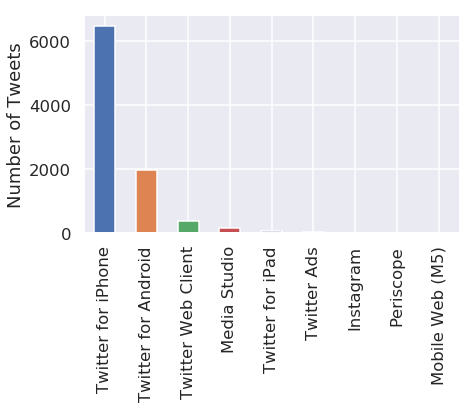

In [22]:
trump['source'].value_counts().plot(kind="bar")
plt.ylabel("Number of Tweets")

## Question 4b


Is there a difference between his Tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets)

In [23]:
for t in trump_tweets[0:3]:
    print(t['created_at'])

Tue Oct 16 16:22:11 +0000 2018
Tue Oct 16 16:18:08 +0000 2018
Tue Oct 16 15:26:33 +0000 2018


We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [24]:
trump['est_time'] = (
    trump['time'].dt.tz_localize("UTC") # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
trump.head()

,retweet_count,source,text,time,est_time
786204978629185536,24915,Twitter for iPhone,PAY TO PLAY POLITICS. \n#CrookedHillary https://t.co/wjsl8ITVvk,2016-10-12 14:00:48,2016-10-12 09:00:48-05:00
786201435486781440,22609,Twitter for iPhone,Very little pick-up by the dishonest media of incredible information provided by WikiLeaks. So dishonest! Rigged system!,2016-10-12 13:46:43,2016-10-12 08:46:43-05:00
786189446274248704,18329,Twitter for Android,Crooked Hillary Clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,2016-10-12 12:59:05,2016-10-12 07:59:05-05:00
786054986534969344,18789,Twitter for iPhone,Thank you Florida- a MOVEMENT that has never been seen before and will never be seen again. Lets get out &amp;… https://t.co/t9XM9wFDZI,2016-10-12 04:04:47,2016-10-11 23:04:47-05:00
786007502639038464,7761,Twitter for iPhone,"Join me Thursday in Florida &amp; Ohio!\nWest Palm Beach, FL at noon:\nhttps://t.co/jwbZnQhxg9\nCincinnati, OH this 7:30pm:\nhttps://t.co/5w2UhalPIx",2016-10-12 00:56:06,2016-10-11 19:56:06-05:00


**What you need to do:**

Add a column called `hour` to the `trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$


In [25]:
hour = [t.hour for t in trump['est_time']]
minute = [t.minute for t in trump['est_time']]
second = [t.second for t in trump['est_time']]
trump['hour'] = np.array(hour) + (np.array(minute) / 60) + (np.array(second) / 60**2)
# make a bar plot here
# raise NotImplementedError()

In [26]:
assert np.isclose(trump.loc[690171032150237184]['hour'], 8.93639)

## Question 4c

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look similar to the following. 

<img src="images/device_hour2.png" width="600px" />

Text(0,0.5,'fraction')

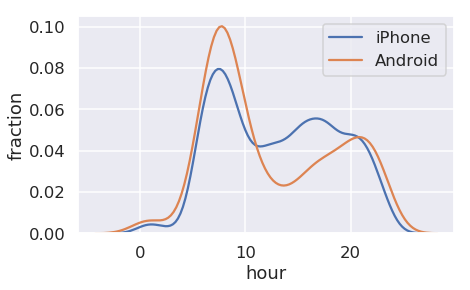

In [27]:
### make your plot here
sns.distplot(trump[trump['source'] == 'Twitter for iPhone']['hour'], hist=False, label='iPhone')
sns.distplot(trump[trump['source'] == 'Twitter for Android']['hour'], hist=False, label='Android')
plt.ylabel('fraction')
# raise NotImplementedError()


## Question 4d

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Create a figure identical to your figure from 4c, except that you should show the results only from 2016. If you get stuck consider looking at the `year_fraction` function from the next problem.

During the campaign, it was theorized that Donald Trump's tweets from Android were written by him personally, and the tweets from iPhone were from his staff. Does your figure give support to this theory?

/srv/conda/envs/data100/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/srv/conda/envs/data100/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Text(0,0.5,'fraction')

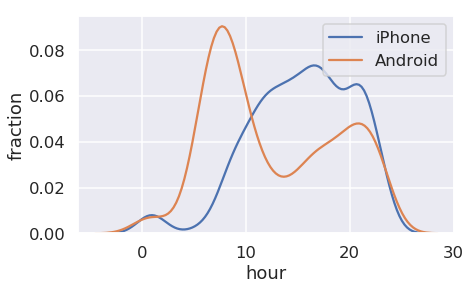

In [28]:
### make your plot here
year2016 = trump[trump['est_time'].apply(lambda f: f.year) == 2016]
sns.distplot(year2016[trump['source'] == 'Twitter for iPhone']['hour'], hist=False, label='iPhone')
sns.distplot(year2016[trump['source'] == 'Twitter for Android']['hour'], hist=False, label='Android')
plt.ylabel('fraction')
# raise NotImplementedError()

The Android distribution shows that Trump tweets in the morning around 8 or 9am and in the evening around 9 or 10pm, which suggests personal usage at the beginning and end of his day. The iPhone distribution indicates tweets being posted throughout the day, when he is supposed to be busy working. This suggests that his employees tweet for him during work hours because that's their job, and he tweets on his personal free time which is the morning and the evening.

## Question 5

Let's now look at which device he has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years)

In [29]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length


trump['year'] = trump['time'].apply(year_fraction)

### Question 5a

Use the `sns.distplot` to overlay the distributions of the 2 most frequently used web technologies over the years.  Your final plot should look like:

<img src="images/source_years.png" width="600px" />


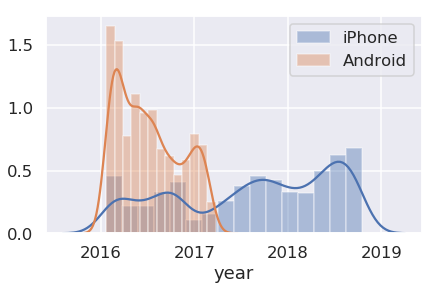

In [30]:
sns.distplot(trump[trump['source'] == 'Twitter for iPhone']['year'], label='iPhone')
sns.distplot(trump[trump['source'] == 'Twitter for Android']['year'], label='Android')
plt.legend()
# raise NotImplementedError()

## Question 6: Sentiment Analysis

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [31]:
print(''.join(open("vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



## Question 6a

As you can see, the lexicon contains emojis too! The first column of the lexicon is the *token*, or the word itself. The second column is the *polarity* of the word, or how positive / negative it is.

(How did they decide the polarities of these words? What are the other two columns in the lexicon? See the link above.)

 Read in the lexicon into a DataFrame called `sent`. The index of the DF should be the tokens in the lexicon. `sent` should have one column: `polarity`: The polarity of each token.

In [32]:
sent = pd.read_csv('vader_lexicon.txt', sep='\t', header=None, index_col=0, usecols=[0,1], names=['token', 'polarity'])
sent
# YOUR CODE HERE
# raise NotImplementedError()

,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7
( '}{' ),1.6
(%,-0.9
('-:,2.2
(':,2.3


In [33]:
assert isinstance(sent, pd.DataFrame)
assert sent.shape == (7517, 1)
assert list(sent.index[5000:5005]) == ['paranoids', 'pardon', 'pardoned', 'pardoning', 'pardons']
assert np.allclose(sent['polarity'].head(), [-1.5, -0.4, -1.5, -0.4, -0.7])

## Question 6b

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

First, let's lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `trump` DF to be the lowercased text of each tweet.

In [34]:
trump['text'] = trump['text'].str.lower()
# raise NotImplementedError()

In [35]:
assert trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'

## Question 6c

Now, let's get rid of punctuation since it'll cause us to fail to match words. Create a new column called `no_punc` in the `trump` DF to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be any character that isn't a Unicode word character or a whitespace character. You may want to consult the Python documentation on regexes for this problem.

(Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.)

In [36]:
# Save your regex in punct_re
punct_re = r'[^\s\w]'
trump['no_punc'] = trump['text'].str.replace(punct_re, ' ')

# YOUR CODE HERE
# raise NotImplementedError()

In [37]:
assert isinstance(punct_re, str)
assert re.search(punct_re, 'this') is None
assert re.search(punct_re, 'this is ok') is None
assert re.search(punct_re, 'this is\nok') is None
assert re.search(punct_re, 'this is not ok.') is not None
assert re.search(punct_re, 'this#is#ok') is not None
assert re.search(punct_re, 'this^is ok') is not None
assert trump['no_punc'].loc[800329364986626048] == 'i watched parts of  nbcsnl saturday night live last night  it is a totally one sided  biased show   nothing funny at all  equal time for us '
assert trump['no_punc'].loc[894620077634592769] == 'on  purpleheartday i thank all the brave men and women who have sacrificed in battle for this great nation   usa   https   t co qmfdlslp6p'
# If you fail these tests, you accidentally changed the text column
assert trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'

## Question 6d:


Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.

The first few rows of our `tidy_format` table look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>894661651760377856</th>
      <td>0</td>
      <td>i</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>1</td>
      <td>think</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>2</td>
      <td>senator</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>3</td>
      <td>blumenthal</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>4</td>
      <td>should</td>
    </tr>
  </tbody>
</table>

**Note that you'll get different results depending on when you pulled in the tweets.** However, you can double check that your tweet with ID `894661651760377856` has the same rows as ours. Our tests don't check whether your table looks exactly like ours.

As usual, try to avoid using any for loops. Our solution uses a chain of 5 methods on the 'trump' DF, albeit using some rather advanced Pandas hacking.

* **Hint 1:** Try looking at the `expand` argument to pandas' `str.split`.

* **Hint 2:** Try looking at the `stack()` method.

* **Hint 3:** Try looking at the `level` parameter of the `reset_index` method.


In [38]:
tidy_format = trump['no_punc'].str.split(expand=True).stack(level=0).reset_index(level=1).rename(columns={'level_1': 'num', 0: 'word'})
tidy_format.index = tidy_format.index.astype(int)
tidy_format.head()
# YOUR CODE HERE
# raise NotImplementedError()

,num,word
786204978629185536,0,pay
786204978629185536,1,to
786204978629185536,2,play
786204978629185536,3,politics
786204978629185536,4,crookedhillary


In [39]:
assert tidy_format.loc[894661651760377856].shape == (27, 2)
assert ' '.join(list(tidy_format.loc[894661651760377856]['word'])) == 'i think senator blumenthal should take a nice long vacation in vietnam where he lied about his service so he can at least say he was there'

## Question 6e:

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

**Hint** you will need to merge the `tidy_format` and `sent` tables and group the final answer.


In [40]:
trump['polarity'] = tidy_format.merge(sent, how='left', left_on='word', right_index=True).reset_index().groupby('index').sum().drop(labels='num', axis=1)
trump['polarity']

# YOUR CODE HERE
# raise NotImplementedError()

786204978629185536     1.0
786201435486781440    -6.9
786189446274248704     1.8
786054986534969344     1.5
786007502639038464     1.2
785979396620324865     0.0
785957064480653313     1.5
785947219216125952     0.0
785913754194104320    -1.9
785910334427058177     4.6
785904113540210688     1.5
785898532645502980     1.6
785890855760465920     0.0
785885793340448769     4.4
785863826361184257     3.6
785854588654092290     1.3
785846205750337537    -0.5
785842546878578688     0.5
785842270801133568     1.5
785828772423561216    -4.9
785816454042124288     4.8
785654535234531329     3.0
785608815962099712    -2.1
785563318652178432    -0.7
785561269571026946     4.6
785559022082658305    -6.7
785530928256933888    -5.9
785527400528568320     6.8
785323809062653952     1.5
785314249044140036     7.3
                      ... 
966766375292358659     9.8
966711641378381826     5.3
966687491616059392     0.6
966681883206668289    12.4
966662241977360384     4.0
966660169194229761     0.9
9

In [41]:
assert np.allclose(trump.loc[744701872456536064, 'polarity'], 8.4)
assert np.allclose(trump.loc[745304731346702336, 'polarity'], 2.5)
assert np.allclose(trump.loc[744519497764184064, 'polarity'], 1.7)
assert np.allclose(trump.loc[894661651760377856, 'polarity'], 0.2)
assert np.allclose(trump.loc[894620077634592769, 'polarity'], 5.4)
# If you fail this test, you dropped tweets with 0 polarity
assert np.allclose(trump.loc[744355251365511169, 'polarity'], 0.0)

Now we have a measure of the sentiment of each of his tweets! Note that this calculation is rather basic; you can read over the VADER readme to understand a more robust sentiment analysis.

Now, run the cells below to see the most positive and most negative tweets from Trump in your dataset:

In [42]:
print('Most negative tweets:')
for t in trump.sort_values('polarity').head()['text']:
    print('\n  ', t)

Most negative tweets:

   it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!

   the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!

   james comey is a proven leaker &amp; liar. virtually everyone in washington thought he should be fired for the terrible job he did-until he was, in fact, fired. he leaked classified information, for which he should be prosecuted. he lied to congress under oath. he is a weak and.....

   this is an illegally brought rigged witch hunt run by people who are totally corrupt and/or conflicted. it was started and paid 

In [43]:
print('Most positive tweets:')
for t in trump.sort_values('polarity', ascending=False).head()['text']:
    print('\n  ', t)

Most positive tweets:

   congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!

   my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!

   thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new poll says trump, at over 90%, is the most popular republican in history of the party. wow!

   thank you, @wvgovernor jim justice, for that warm introduction. tonight, it was my great honor to attend the “greenbrier classic – salute to service dinner” in west virginia! god bless ou

## Question 6g

Plot the distribution of tweet sentiments broken down by whether the text of the tweet contains `nyt` or `fox`.  Then in the box below comment on what we observe?

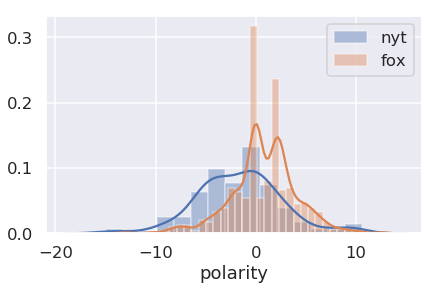

In [44]:
sns.distplot(trump[trump['no_punc'].str.contains('nyt')]['polarity'], label='nyt')
sns.distplot(trump[trump['no_punc'].str.contains('fox')]['polarity'], label='fox')
plt.legend()
# raise NotImplementedError()

#### Comment on what you observe:

Both distributions appear to be centered around neutral polarity. However, the distribution of tweets containing 'nyt' seems to be shifted slightly to the left of the one containing 'fox'. This could mean that Trump's sentiments regarding the New York Times are less positive compared to those mentioning Fox News. 

In [45]:
tidy_format

,num,word
786204978629185536,0,pay
786204978629185536,1,to
786204978629185536,2,play
786204978629185536,3,politics
786204978629185536,4,crookedhillary
786204978629185536,5,https
786204978629185536,6,t
786204978629185536,7,co
786204978629185536,8,wjsl8itvvk
786201435486781440,0,very


## Question 7: Engagement

## Question 7a

In this problem, we'll explore which words led to a greater average number of retweets. For example, at the time of this writing, Donald Trump has two tweets that contain the word 'oakland' (tweets 932570628451954688 and 1016609920031117312) with 36757 and 10286 retweets respectively, for an average of 23,521.5.

Find the top 20 most retweeted words. Include only words that appear in at least 25 tweets. As usual, try to do this without any for loops. You can string together ~7 pandas commands and get everything done on one line.

Your `top_20` table should have this format:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>retweet_count</th>
    </tr>
    <tr>
      <th>word</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>jong</th>
      <td>40675.666667</td>
    </tr>
    <tr>
      <th>try</th>
      <td>33937.800000</td>
    </tr>
    <tr>
      <th>kim</th>
      <td>32849.595745</td>
    </tr>
    <tr>
      <th>un</th>
      <td>32741.731707</td>
    </tr>
    <tr>
      <th>maybe</th>
      <td>30473.192308</td>
    </tr>
  </tbody>
</table>

In [46]:
test = tidy_format.reset_index().groupby(['index','word']).count().reset_index().groupby('word').size().to_frame()
test = test[test[0] >= 25]
test.head()

,0
word,
00,97
000,131
1,114
10,66
100,49


In [47]:
new_tidy_format = tidy_format[tidy_format['word'].isin(test.index)]
new_tidy_format

,num,word
786204978629185536,0,pay
786204978629185536,1,to
786204978629185536,2,play
786204978629185536,3,politics
786204978629185536,4,crookedhillary
786204978629185536,5,https
786204978629185536,6,t
786204978629185536,7,co
786201435486781440,0,very
786201435486781440,1,little


In [48]:
top_20 = trump.merge(new_tidy_format, how='right', left_index=True, right_index=True)
top_20 = top_20.groupby('word').mean()
top_20 = top_20.iloc[:, 0].to_frame().sort_values(by='retweet_count', ascending=False).iloc[0:20]
top_20
# YOUR CODE HERE
# raise NotImplementedError()

,retweet_count
word,
jong,39630.933333
try,32529.560000
un,31940.121951
kim,31648.387755
maybe,29837.076923
kavanaugh,28651.962963
nuclear,28592.080000
mccabe,27669.709677
illegally,27661.322581


In [49]:
# Although it can't be guaranteed, it's very likely that the top 5 words will still be
# in the top 20 words in the next month.
assert 'jong'     in top_20.index
assert 'try'     in top_20.index
assert 'kim' in top_20.index
assert 'un'    in top_20.index
assert 'maybe'    in top_20.index


Here's a bar chart of your results:

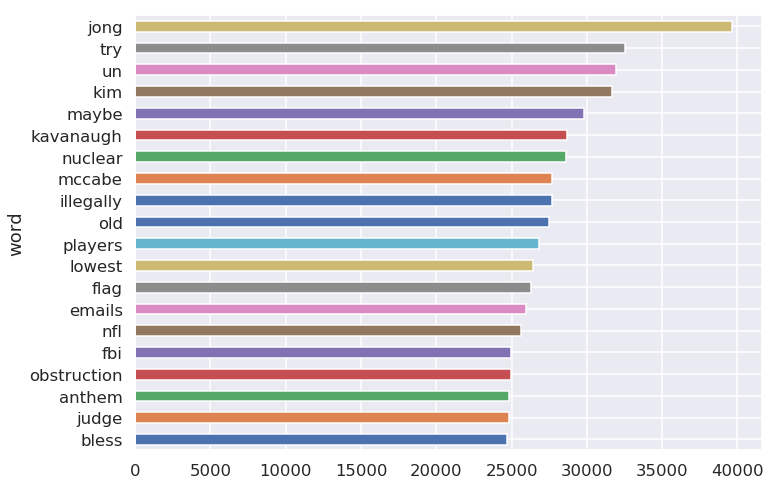

In [50]:
top_20['retweet_count'].sort_values().plot.barh(figsize=(10, 8));

## Question 7b

"kim", "jong" and "un" are apparently really popular in Trump's tweets! It seems like we can conclude that his tweets involving jong are more popular than his other tweets. Or can we?

Consider each of the statements about possible confounding factors below. State whether each statement is true or false and explain. If the statement is true, state whether the confounding factor could have made kim jong un related tweets higher in the list than they should be.

1. We didn't restrict our word list to nouns, so we have unhelpful words like "let" and "any" in our result.
1. We didn't remove hashtags in our text, so we have duplicate words (eg. #great and great).
1. We didn't account for the fact that Trump's follower count has increased over time.

1. True. As seen in our list of Top 20 words, we have words like "try" and "maybe" in the list, which are both not nouns. However, this does not seem to be a clear confounding factor for the popularity of Kim Jong Un tweets. Were non-noun words filtered out, "kim", "jong" and "un" would still retain their place at the top of the list. 
2. False. During the filtering process, we took out all punctuation and made a column named "no_punc" which contained all tweets without any punctuation. 
3. True. We have not considered how Trump's twitter following has increased over time. It is not immediately obvious whether or not this is a confounding factor. Trump started posting tweets involved with Kim Jong Un in 2016 up until present day in 2018, which is the same time span that the dataset covers. An increase in his followers from 2016 to 2018 might not be able to account for why these certain tweets are so highly retweeted if Trump has already been tweeting about Kim Jong Un since 2016. On the other hand, we do not know if Trump tweets about Kim Jong Un more oftenly now than he did in earlier years. In this case, the more posts he makes about Kim will be seen by more and more people everyday, which may contribute to its popularity. 

## Question 8

Using the `trump` tweets construct an interesting plot describing a property of the data and discuss what you found below.

**Ideas:**

1. How has the sentiment changed with length of the tweets?
1. Does sentiment affect retweet count?
1. Are retweets more negative than regular tweets?
1. Are there any spikes in the number of retweets and do the correspond to world events? 
1. *Bonus:* How many Russian twitter bots follow Trump? 
1. What terms have an especially positive or negative sentiment?

You can look at other data sources and even tweets.


### Plot:

In [51]:
trump.sort_values(by='retweet_count', ascending=False)

,retweet_count,source,text,time,est_time,hour,year,no_punc,polarity
881503147168071680,370272,Twitter for iPhone,#fraudnewscnn #fnn https://t.co/wyunhjjujg,2017-07-02 13:21:42,2017-07-02 08:21:42-05:00,8.361667,2017.498630,fraudnewscnn fnn https t co wyunhjjujg,0.0
795954831718498305,337819,Twitter for Android,today we make america great again!,2016-11-08 11:43:14,2016-11-08 06:43:14-05:00,6.720556,2016.852459,today we make america great again,3.1
929511061954297857,254000,Twitter Web Client,"why would kim jong-un insult me by calling me ""old,"" when i would never call him ""short and fat?"" oh well, i try so hard to be his friend - and maybe someday that will happen!",2017-11-12 00:48:01,2017-11-11 19:48:01-05:00,19.800278,2017.863014,why would kim jong un insult me by calling me old when i would never call him short and fat oh well i try so hard to be his friend and maybe someday that will happen,0.6
796315640307060738,215794,Twitter for Android,such a beautiful and important evening! the forgotten man and woman will never be forgotten again. we will all come together as never before,2016-11-09 11:36:58,2016-11-09 06:36:58-05:00,6.616111,2016.855191,such a beautiful and important evening the forgotten man and woman will never be forgotten again we will all come together as never before,1.9
948355557022420992,180010,Twitter for iPhone,"north korean leader kim jong un just stated that the “nuclear button is on his desk at all times.” will someone from his depleted and food starved regime please inform him that i too have a nuclear button, but it is a much bigger &amp; more powerful one than his, and my butto...",2018-01-03 00:49:19,2018-01-02 19:49:19-05:00,19.821944,2018.005479,north korean leader kim jong un just stated that the nuclear button is on his desk at all times will someone from his depleted and food starved regime please inform him that i too have a nuclear button but it is a much bigger amp more powerful one than his and my butto...,0.5
741007091947556864,166748,Twitter for iPhone,"how long did it take your staff of 823 people to think that up--and where are your 33,000 emails that you deleted? https://t.co/geclntqizq",2016-06-09 20:40:32,2016-06-09 15:40:32-05:00,15.675556,2016.437158,how long did it take your staff of 823 people to think that up and where are your 33 000 emails that you deleted https t co geclntqizq,0.0
815185071317676033,137964,Twitter for Android,"happy new year to all, including to my many enemies and those who have fought me and lost so badly they just don't know what to do. love!",2016-12-31 13:17:21,2016-12-31 08:17:21-05:00,8.289167,2016.997268,happy new year to all including to my many enemies and those who have fought me and lost so badly they just don t know what to do love,-1.0
755788382618390529,115589,Twitter Web Client,the media is spending more time doing a forensic analysis of melania's speech than the fbi spent on hillary's emails.,2016-07-20 15:36:06,2016-07-20 10:36:06-05:00,10.601667,2016.549180,the media is spending more time doing a forensic analysis of melania s speech than the fbi spent on hillary s emails,0.0
1016647764434931713,111303,Twitter for iPhone,"rt @realdonaldtrump: they just didn't get it, but they do now! https://t.co/9t50nupkdy",2018-07-10 11:38:10,2018-07-10 06:38:10-05:00,6.636111,2018.520548,rt realdonaldtrump they just didn t get it but they do now https t co 9t50nupkdy,0.0
1016079192604139520,111303,Media Studio,"they just didn't get it, but they do now! https://t.co/9t50nupkdy",2018-07-08 21:58:52,2018-07-08 16:58:52-05:00,16.981111,2018.515068,they just didn t get it but they do now https t co 9t50nupkdy,0.0


In [52]:
trump.sort_values(by='polarity', ascending=True)

,retweet_count,source,text,time,est_time,hour,year,no_punc,polarity
1031590431379865600,28007,Twitter for iPhone,"it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!",2018-08-20 17:14:59,2018-08-20 12:14:59-05:00,12.249722,2018.632877,it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u s postal system from china we can and must end this now the senate should pass the stop act and firmly stop this poison from killing our children and destroying our country no more delay,-20.3
1029731513573822464,18887,Twitter for iPhone,"the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!",2018-08-15 14:08:18,2018-08-15 09:08:18-05:00,9.138333,2018.619178,the rigged russian witch hunt goes on and on as the originators and founders of this scam continue to be fired and demoted for their corrupt and illegal activity all credibility is gone from this terrible hoax and much more will be lost as it proceeds no collusion,-16.6
984763579210633216,31488,Twitter for iPhone,"james comey is a proven leaker &amp; liar. virtually everyone in washington thought he should be fired for the terrible job he did-until he was, in fact, fired. he leaked classified information, for which he should be prosecuted. he lied to congress under oath. he is a weak a...",2018-04-13 12:01:47,2018-04-13 07:01:47-05:00,7.029722,2018.279452,james comey is a proven leaker amp liar virtually everyone in washington thought he should be fired for the terrible job he did until he was in fact fired he leaked classified information for which he should be prosecuted he lied to congress under oath he is a weak a...,-16.0
1027585937163931648,25954,Twitter for iPhone,"this is an illegally brought rigged witch hunt run by people who are totally corrupt and/or conflicted. it was started and paid for by crooked hillary and the democrats. phony dossier, fisa disgrace and so many lying and dishonest people already fired. 17 angry dems? stay tuned!",2018-08-09 16:02:33,2018-08-09 11:02:33-05:00,11.042500,2018.602740,this is an illegally brought rigged witch hunt run by people who are totally corrupt and or conflicted it was started and paid for by crooked hillary and the democrats phony dossier fisa disgrace and so many lying and dishonest people already fired 17 angry dems stay tuned,-15.2
1031508193107763200,23739,Twitter for iPhone,"where’s the collusion? they made up a phony crime called collusion, and when there was no collusion they say there was obstruction (of a phony crime that never existed). if you fight back or say anything bad about the rigged witch hunt, they scream obstruction!",2018-08-20 11:48:12,2018-08-20 06:48:12-05:00,6.803333,2018.632877,where s the collusion they made up a phony crime called collusion and when there was no collusion they say there was obstruction of a phony crime that never existed if you fight back or say anything bad about the rigged witch hunt they scream obstruction,-15.0
1022808452677160960,22298,Twitter for iPhone,"....,the only collusion with russia was with the democrats, so now they are looking at my tweets (along with 53 million other people) - the rigged witch hunt continues! how stupid and unfair to our country....and so the fake news doesn’t waste my time with dumb questions, no,...",2018-07-27 11:38:32,2018-07-27 06:38:32-05:00,6.642222,2018.567123,the only collusion with russia was with the democrats so now they are looking at my tweets along with 53 million other people the rigged witch hunt continues how stupid and unfair to our country and so the fake news doesn t waste 

Text(0.5,1,'Polarity vs. Retweet Count')

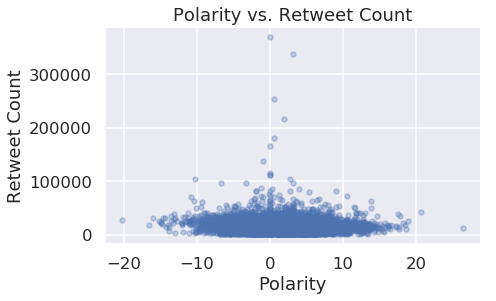

In [53]:
x = trump['polarity']
y = trump['retweet_count']
plt.scatter(x, y, s=25, alpha=0.3)
plt.xlabel('Polarity')
plt.ylabel('Retweet Count')
plt.title("Polarity vs. Retweet Count")
# raise NotImplementedError()

### Discussion of Your Plot:

With this distribution, I wanted to look at the relationship between sentiments of tweets and their retweet count. The basic scatterplot above illustrates a blob-like distribution between the two features of interest. Most data points are contained within a band of values from 0 to 100,000 regardless of polarity. One interesting characteristic of this plot is the sparse trail of tweets stemming from the center of the distribution. These tweets have a much higher retweet count than the rest of the data, yet they are all mostly neutral sentiments. This seems a bit counterintuitive since one would expect that more emotional language would lead to a greater reaction within his followers, but this is not the case. Overall, there doesn't seem to be a clear relationship between a tweet's sentiment and the amount of retweets it receives.

## Submission

Congrats, you just finished Project 1!

## Submission

You're done!

Before submitting this assignment, ensure to:

1. Restart the Kernel (in the menubar, select Kernel->Restart & Run All)
2. Validate the notebook by clicking the "Validate" button

Finally, make sure to **submit** the assignment via the Assignments tab in Datahub